In [125]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 237MB/s]
100% 1.06G/1.06G [00:07<00:00, 160MB/s]


In [127]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [128]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [129]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [130]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [131]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [132]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [133]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.4142 - accuracy: 0.6084 - val_loss: 0.5860 - val_accuracy: 0.6872
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5614 - accuracy: 0.7123 - val_loss: 0.7444 - val_accuracy: 0.5862
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4934 - accuracy: 0.7605 - val_loss: 0.5080 - val_accuracy: 0.7596
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4313 - accuracy: 0.8027 - val_loss: 0.4846 - val_accuracy: 0.7694
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3695 - accuracy: 0.8377 - val_loss: 0.4779 - val_accuracy: 0.7704
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2850 - accuracy: 0.8813 - val_loss: 1.2595 - val_accuracy: 0.6280
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2114 - accuracy: 0.9137 - val_loss: 0.5593 - val_ac

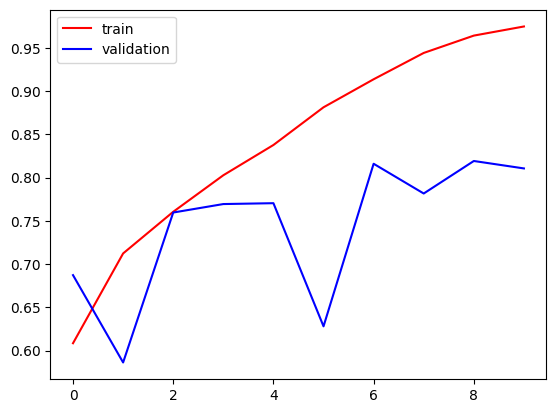

In [135]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

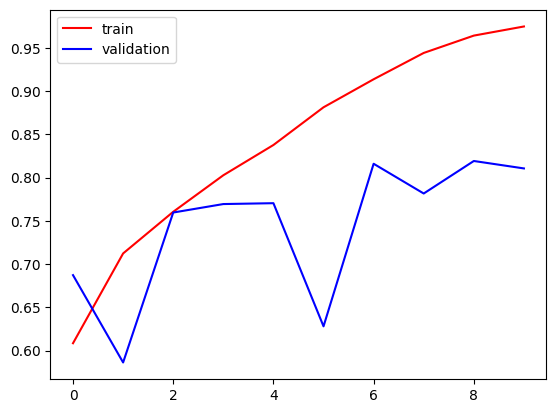

In [136]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

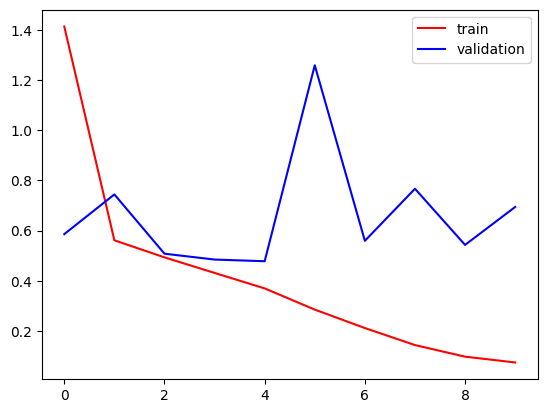

In [137]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

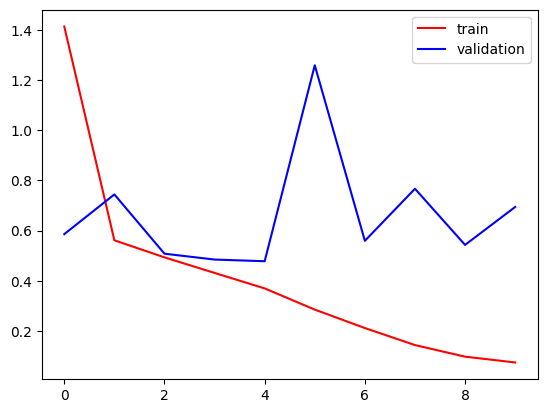

In [138]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [139]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [159]:
import cv2

In [166]:
test_img = cv2.imread('/content/beagle-tricolor-puppy-is-posing-cute-white-braun-black-doggy-pet-is-sitting-blue-background-looks-attented-sad-studio-photoshot-concept-motion-movement-action-negative-space.jpg')

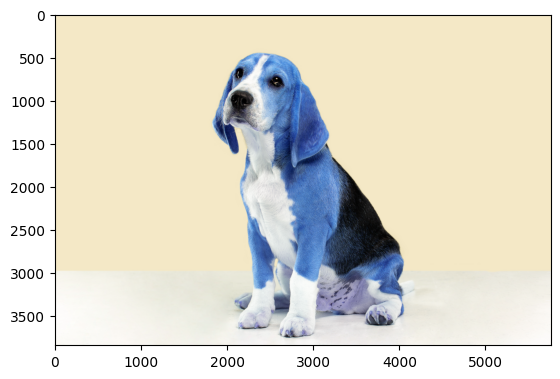

In [167]:
plt.imshow(test_img)

In [168]:
test_img.shape

(3840, 5760, 3)

In [169]:
test_img = cv2.resize(test_img,(256,256))

In [170]:
test_input = test_img.reshape((1,256,256,3))

In [171]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)